## CNN Model Implementation for Covid images

__Q1.Prepare the Dataset- Load the dataset into appropriate data structures, ensuring images are resized to be fed as input to the CNN.__

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras')

# Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Set the dataset directory path
data_dir = 'C:/Users/User/Downloads/'
train_val_dir = os.path.join(data_dir, 'train_validate')
test_dir = os.path.join(data_dir, 'test')

# Data preprocessing
image_size = (128, 128)
batch_size = 32

# Data Augmentation and Loading
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_generator = train_datagen.flow_from_directory(
    train_val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1382 images belonging to 2 classes.
Found 345 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


__Q2.Build the CNN Model__ Using TensorFlow and Keras, create a CNN model with the following indicative architecture:

Convolution Layer → Activation Function (ReLU) → Pooling Layer  
(Convolution Layer → Activation Function) × 2 → Pooling Layer  
Fully Connected Layer → Activation Function Softmax Classifier  
Use a pool size of 2x2, filter size of 3x3, and any other standard parameters as needed.   

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # Use softmax for categorical
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

__Q3. Train the Model__ Train the model for 30 epochs (E=30). Log and plot the following metrics for each epoch:  

Training Loss  
Training Accuracy  
Validation Loss  
Validation Accuracy  
Save these metrics and present them as a graph after training is complete.  

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 38s 766ms/step - accuracy: 0.8346 - loss: 2.2596 - val_accuracy: 0.4870 - val_loss: 9.8282
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 783ms/step - accuracy: 0.8921 - loss: 1.1533 - val_accuracy: 0.4870 - val_loss: 16.1731
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 790ms/step - accuracy: 0.9206 - loss: 0.8643 - val_accuracy: 0.4870 - val_loss: 9.0270
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 799ms/step - accuracy: 0.9386 - loss: 0.4194 - val_accuracy: 0.5913 - val_loss: 13.2883
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 749ms/step - accuracy: 0.9156 - loss: 0.5151 - val_accuracy: 0.4870 - val_loss: 18.9686
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 737ms/step - accuracy: 0.9412 - loss: 0.2810 - val_accuracy: 0.5594 - val_loss: 6.0381
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 40s 709ms/step - accuracy: 0.9336 - loss: 0.3204 - val_accuracy: 0.7768 - val_loss: 1.4314
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 31s 710ms/step - accuracy: 0.9307 - loss: 0.2427 - val_a

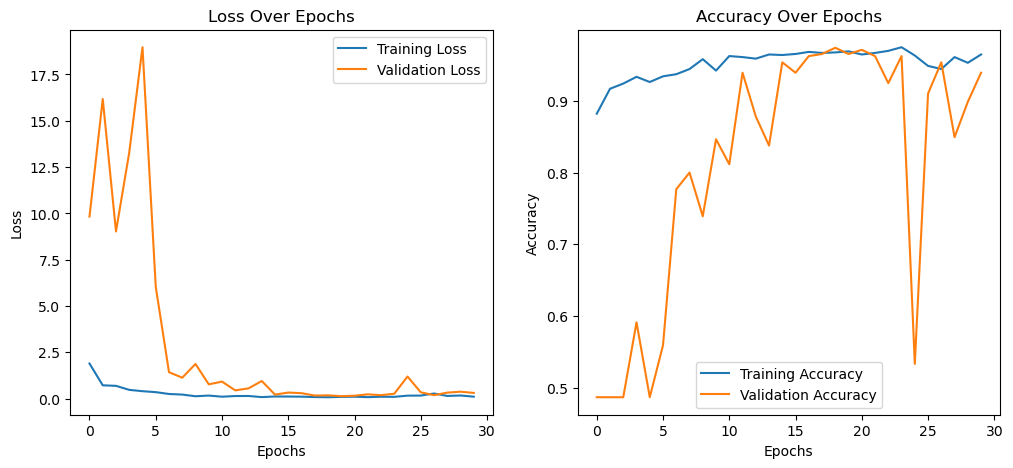

In [7]:

# Early stopping
#early_stop = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

# Plot metrics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


__Q4.Evaluate the Model__ -Test the trained CNN on the testing dataset and print the classification metrics, including precision, recall, and F1-score. 

In [9]:
# Evaluate the model
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Classification report
print('Classification Report:')
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step
Classification Report:
              precision    recall  f1-score   support

      masked       0.86      0.81      0.84       160
    unmasked       0.82      0.87      0.84       160

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



__Q5. Model Improvement with mobilevnet2__  
Modify the default CNN model to improve its performance. 
Compare the performance of the original ("default") and modified ("improved") models by plotting precision and recall side-by-side in a bar chart. 

In [ ]:
# Load MobileNetV2 base
base_model = MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base

# Build model
improved_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # For categorical
])

# Compile
improved_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(patience=5, restore_best_weights=True)


# Train
improved_history = improved_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    callbacks=[early_stop]
)


# Evaluate the models

# Predictions for the default model (already computed)
default_precision = precision_score(y_true, y_pred_classes, average='weighted')
default_recall = recall_score(y_true, y_pred_classes, average='weighted')

# Predictions for the improved model
y_pred_improved = improved_model.predict(test_generator)
y_pred_improved_classes = np.argmax(y_pred_improved, axis=1)

improved_precision = precision_score(y_true, y_pred_improved_classes, average='weighted')
improved_recall = recall_score(y_true, y_pred_improved_classes, average='weighted')

# Classification report for improved model
print('Classification Report with Improved Model: \n')
print(classification_report(y_true, y_pred_improved_classes, target_names=test_generator.class_indices.keys()))

# Plot precision and recall comparison
labels = ['Default', 'Improved']
precision_scores = [default_precision, improved_precision]
recall_scores = [default_recall, improved_recall]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, precision_scores, width, label='Precision')
plt.bar(x + width/2, recall_scores, width, label='Recall')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Precision and Recall Comparison')
plt.xticks(x, labels)
plt.legend()
plt.show()


Epoch 1/25
17/44 ━━━━━━━━━━━━━━━━━━━━ 8s 323ms/step - accuracy: 0.7131 - loss: 0.6995 

__Q6.Visualize Predictions__  
Display 5 sample images from the test set predicted as "masked" and 5 predicted as "unmasked." Include the predicted labels for each image. 

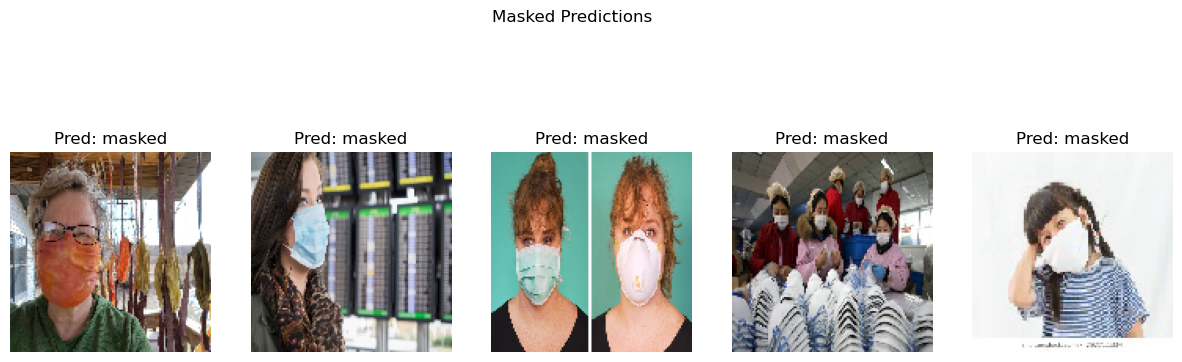

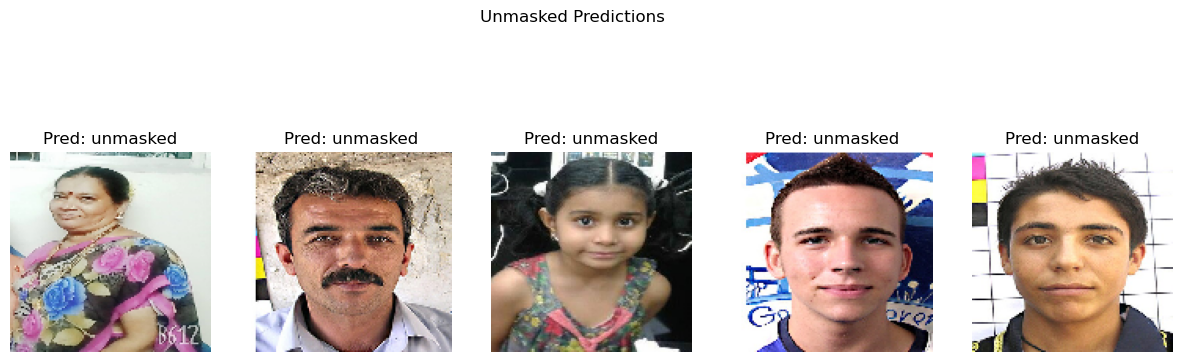

In [13]:
def display_sample_predictions(generator, predictions, class_labels, target_label, title):
    """
    Display sample images predicted as a specific class.
    """
    # Get indices where the prediction matches the target_label
    indices = np.where(predictions == target_label)[0][10:15]
    plt.figure(figsize=(15, 5))

    for i, idx in enumerate(indices):
        # Get the corresponding image from the generator
        image, label = generator[idx // generator.batch_size]
        image_index = idx % generator.batch_size  # Adjust index within the batch
        
        plt.subplot(1, 5, i + 1)
        plt.imshow(image[image_index])  # Display the specific image within the batch
        plt.title(f"Pred: {class_labels[target_label]}")
        plt.axis('off')

    plt.suptitle(title)
    plt.show()

# Define class labels from the test generator
class_labels = list(test_generator.class_indices.keys())

# Display masked and unmasked predictions
display_sample_predictions(test_generator, y_pred_improved_classes, class_labels, target_label=0, title="Masked Predictions")
display_sample_predictions(test_generator, y_pred_improved_classes, class_labels, target_label=1, title="Unmasked Predictions")
